In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

from tensorflow import keras
from keras.datasets import reuters
from keras import layers

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
len(train_data[10])

31

In [6]:
train_data[10][0:10]

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([
    (value, key) for (key, value) in word_index.items()
])
decoded_newswire = " ".join([
    reverse_word_index.get(i - 3, "?") for i in train_data[0]
])

In [8]:
train_labels[10]

3

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [11]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [13]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 5s 193ms/step - loss: 2.6937 - accuracy: 0.4708 - val_loss: 1.8287 - val_accuracy: 0.5940
Epoch 2/20
16/16 [==============================] - 2s 149ms/step - loss: 1.5476 - accuracy: 0.6649 - val_loss: 1.3841 - val_accuracy: 0.6860
Epoch 3/20
16/16 [==============================] - 2s 144ms/step - loss: 1.1802 - accuracy: 0.7395 - val_loss: 1.2028 - val_accuracy: 0.7380
Epoch 4/20
16/16 [==============================] - 2s 113ms/step - loss: 0.9604 - accuracy: 0.7922 - val_loss: 1.0929 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 2s 101ms/step - loss: 0.7957 - accuracy: 0.8301 - val_loss: 1.0058 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 2s 100ms/step - loss: 0.6641 - accuracy: 0.8523 - val_loss: 0.9813 - val_accuracy: 0.7780
Epoch 7/20
16/16 [==============================] - 2s 118ms/step - loss: 0.5610 - accuracy: 0.8775 - val_loss: 0.9106 - val_accuracy: 0.8090
Epoch 

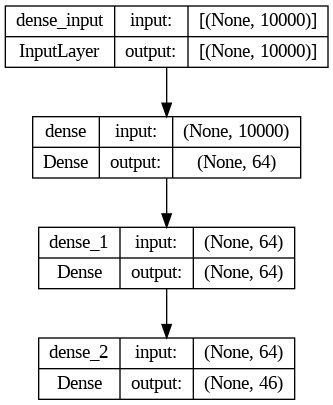

In [16]:
keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

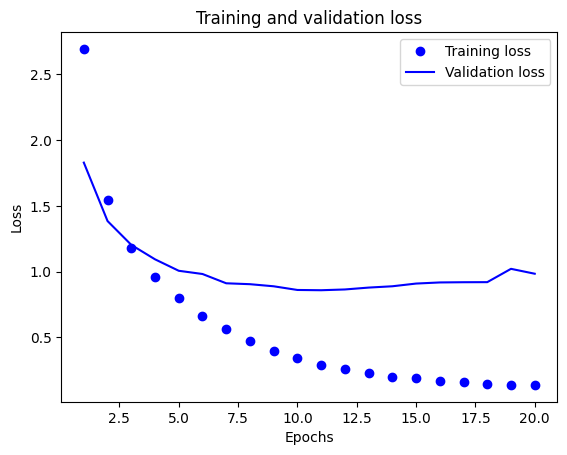

In [17]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

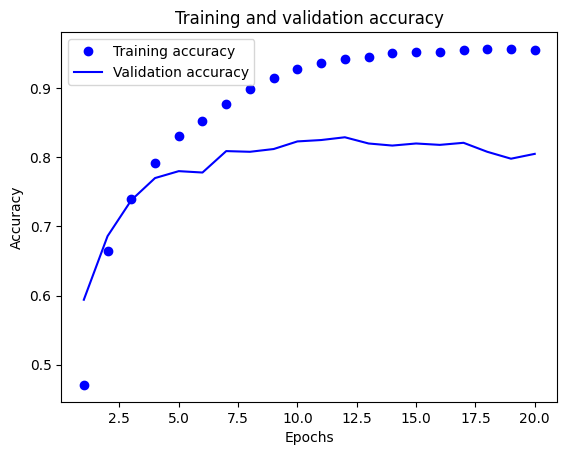

In [18]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 80ms/step - loss: 2.5881 - accuracy: 0.4758
Epoch 2/9
18/18 [==============================] - 2s 107ms/step - loss: 1.4879 - accuracy: 0.6751
Epoch 3/9
18/18 [==============================] - 2s 110ms/step - loss: 1.1397 - accuracy: 0.7473
Epoch 4/9
18/18 [==============================] - 2s 103ms/step - loss: 0.9261 - accuracy: 0.7985
Epoch 5/9
18/18 [==============================] - 2s 82ms/step - loss: 0.7605 - accuracy: 0.8327
Epoch 6/9
18/18 [==============================] - 2s 94ms/step - loss: 0.6320 - accuracy: 0.8616
Epoch 7/9
18/18 [==============================] - 2s 111ms/step - loss: 0.5236 - accuracy: 0.8884
Epoch 8/9
18/18 [==============================] - 2s 94ms/step - loss: 0.4394 - accuracy: 0.9059
Epoch 9/9
71/71 [==============================] - 1s 6ms/step - loss: 0.8916 - accuracy: 0.7916


In [20]:
results

[0.891649067401886, 0.7916295528411865]

In [21]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1892252894033838

In [22]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 5ms/step


In [23]:
predictions[0].shape

(46,)

In [24]:
np.sum(predictions[0])

0.99999994

In [25]:
np.argmax(predictions[0])

3